# Data examination
## Correlation lenghts

The data is found in the following files:

- Computation results: `read.csv("..\\..\\data\\results.csv", header = TRUE, sep = ",")`
- Fit data: `read.csv("..\\..\\data\\results_fit.csv", header = TRUE, sep = ",")`
- Correlation lenghths: `read.csv("..\\..\\data\\results_corr.csv", header = TRUE, sep = ",")`
- Correlation functions: `read.csv(paste("..\\..\\data\\plot_data\\correlation_", index, ".csv", sep = ""), header = FALSE)`

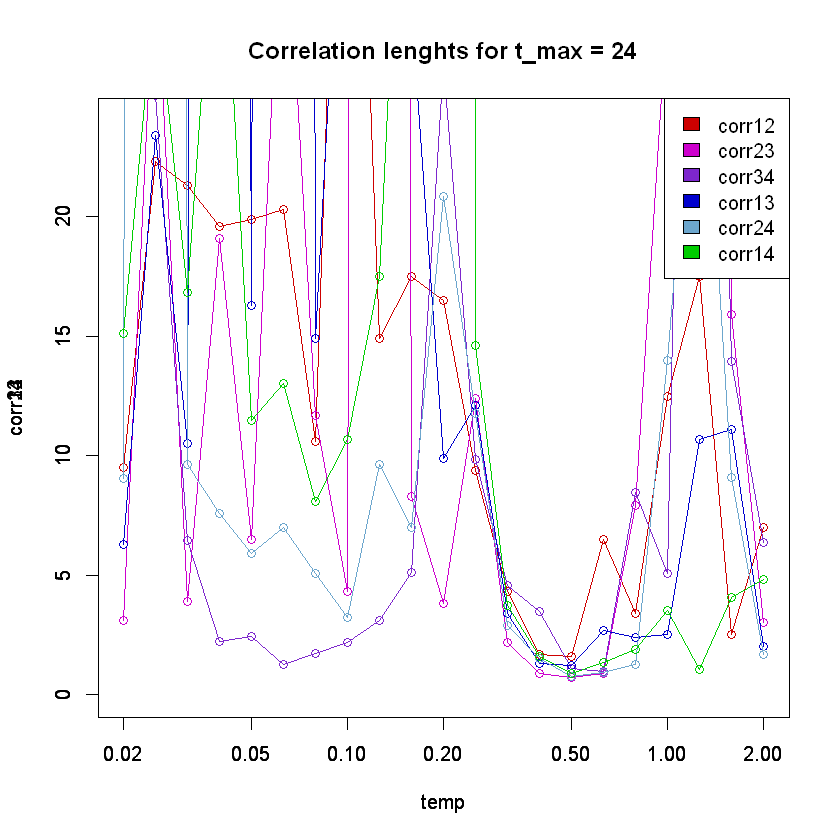

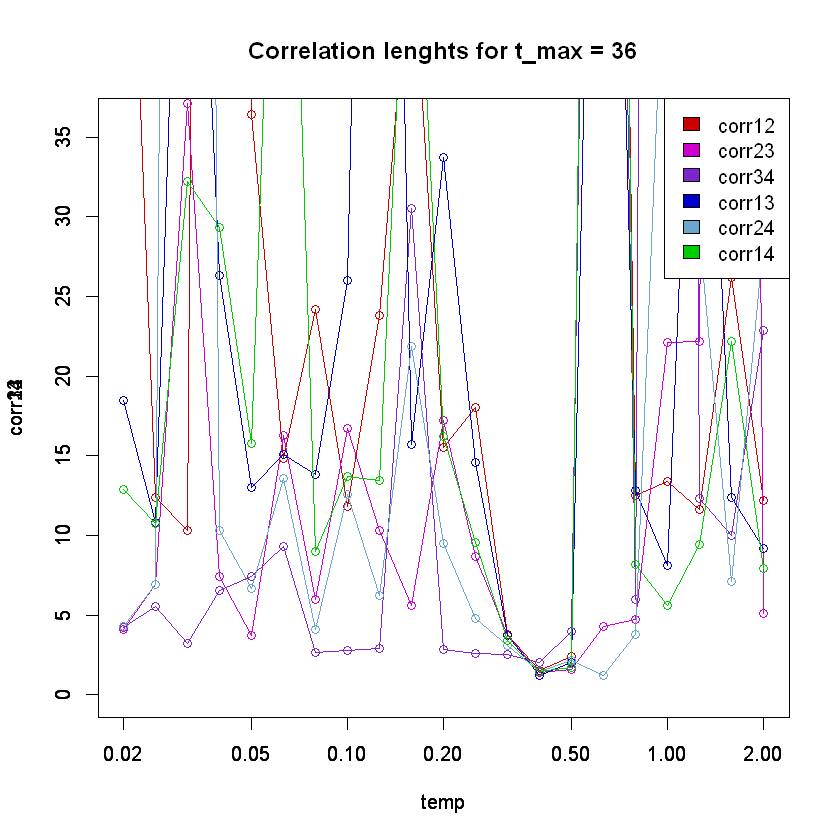

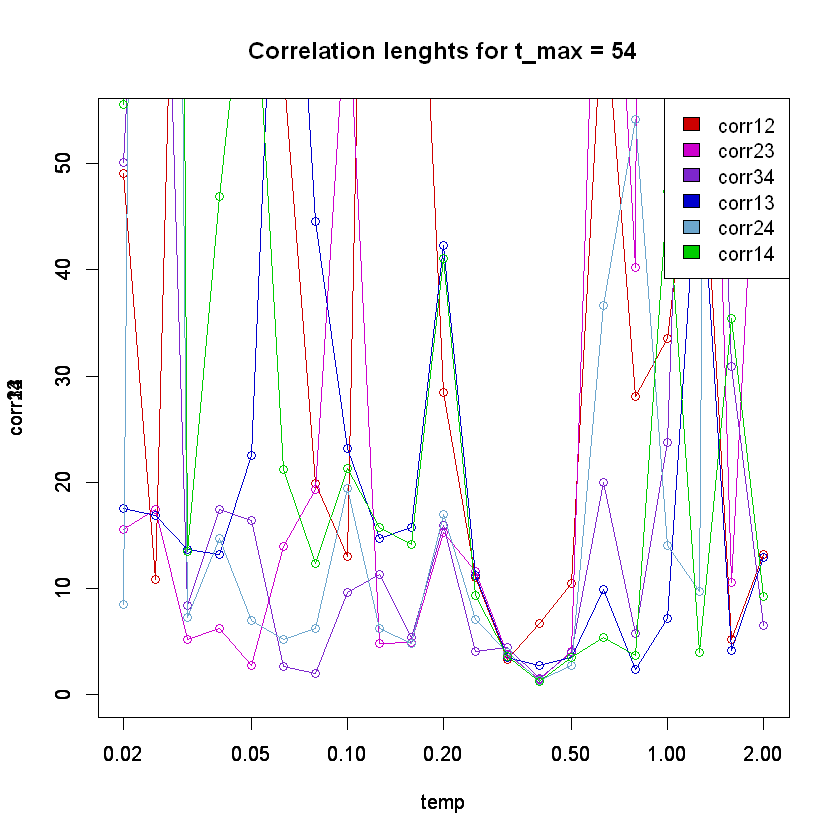

In [10]:
# Presenting the correlation lenght data in a simple table
results <- read.csv("..\\..\\data\\results.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\..\\data\\results_fit.csv", header = TRUE, sep = ",")
corr <- read.csv("..\\..\\data\\results_corr.csv", header = TRUE, sep = ",")

d <- corr[, !(names(corr) %in% c("m12", "m23", "m13"))]
d$corr12 <- round(d$corr12, digits = 1)
d$corr23 <- round(d$corr23, digits = 1)
d$corr13 <- round(d$corr13, digits = 1)
d$corr_fit <- round(fit$corr, digits = 1)
temps <- c()
max_ts <- c()
for (index in d$index) {
	temps <- append(temps, results$temp[results$index == index])
	max_ts <- append(max_ts, results$t[results$index == index])
}
d$temp <- temps
d$max_t <- max_ts
overview <- d

for (size in c(24, 36, 54)) {

d <- overview[overview$max_t == size, ]
plot(corr12 ~ temp, data = d, log = "x", ylim = c(0, size), col = "red3", type = "o")
par(new=TRUE)
plot(corr23 ~ temp, data = d, log = "x", ylim = c(0, size), col = "magenta3", type = "o")
par(new=TRUE)
plot(corr34 ~ temp, data = d, log = "x", ylim = c(0, size), col = "purple3", type = "o")
par(new=TRUE)
plot(corr13 ~ temp, data = d, log = "x", ylim = c(0, size), col = "blue3", type = "o")
par(new=TRUE)
plot(corr24 ~ temp, data = d, log = "x", ylim = c(0, size), col = "skyblue3", type = "o")
par(new=TRUE)
plot(corr14 ~ temp, data = d, log = "x", ylim = c(0, size), col = "green3", type = "o")
legend("topright", c("corr12", "corr23", "corr34", "corr13", "corr24", "corr14"), fill = c("red3", "magenta3", "purple3", "blue3", "skyblue3", "green3"))
title(paste("Correlation lenghts for t_max =", size))
}

## Correlation function

,index,corr12,corr23,corr13,corr_fit,temp,max_t
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
37,36,66.9,95.9,9.9,1,0.63095,54


,index,m,n,a,b,corr
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
37,36,0.9693925,54,1.069475e-12,0.06778474,1.031574


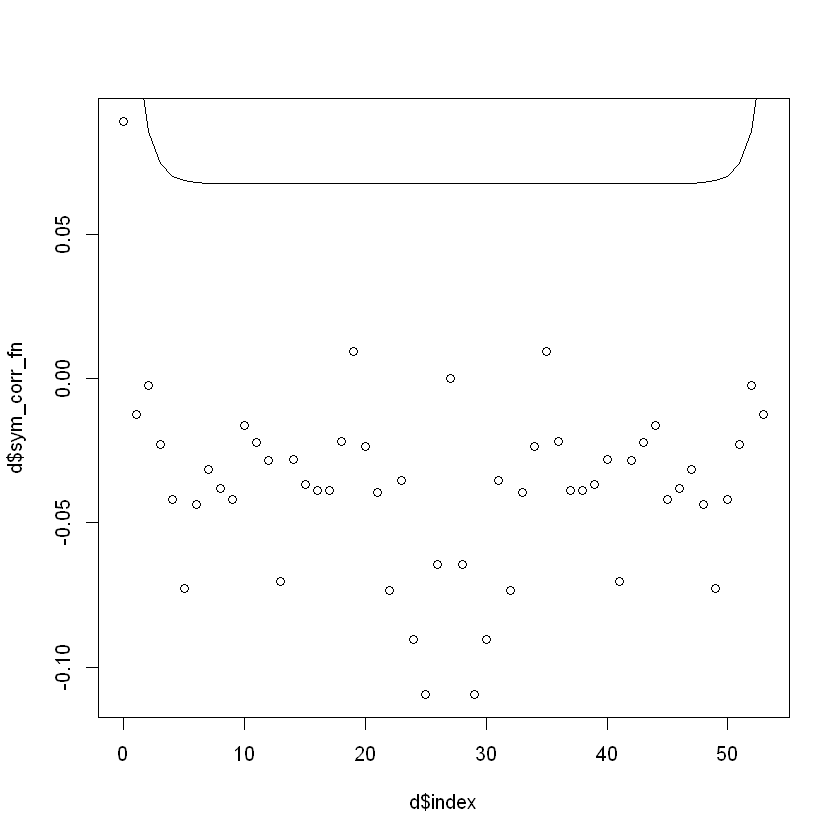

In [13]:
results <- read.csv("..\\..\\data\\results.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\..\\data\\results_fit.csv", header = TRUE, sep = ",")
corr <- read.csv("..\\..\\data\\results_corr.csv", header = TRUE, sep = ",")

index <- 36
d <- read.csv(paste("..\\..\\data\\plot_data\\correlation_", index, ".csv", sep = ""), header = FALSE)
colnames(d) <- c("corr_fn")
d$index <- 1:nrow(d) - 1
d$corr_fn <- d$corr_fn[d$index == (nrow(d) / 2)] - d$corr_fn

d$sym_corr_fn <- d$corr_fn
for (i in 1:(nrow(d) - 1)) {
	d$sym_corr_fn[d$index == i] <- (d$corr_fn[d$index == i] + d$corr_fn[d$index == (nrow(d) - i)]) / 2
}

overview[overview$index == index, ]

params <- fit[fit$index == index, ]
params
d$fit <- params$a * cosh(params$m * (d$index - params$n / 2)) + params$b
plot(d$index, d$sym_corr_fn)
lines(d$index, d$fit)